In [1]:
import pandas as pd
import spline
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from merge_script import modify_first_column
import math
from sklearn.decomposition import PCA
import glob
import Calculate_Feature
import os
from spline import np_move_avg
# ori_bool = False
#
# ori_path = "Ori_motion"
# Mod_path = "Modify_motion"
# if ori_bool:
#     paths = os.walk(ori_path)
# else:
#     paths = os.walk(Mod_path)
#
# acc_fold_path_o = "./save_data/ori/acc_data/"
# pos_fold_path_o = "./save_data/ori/pos_data/"
# acc_fold_path_m = "./save_data/modify/acc_data/"
# pos_fold_path_m = "./save_data/modify/pos_data/"
# file_names = ["Waist.csv", "L_Upper_Leg.csv", "L_Lower_Leg.csv", "R_Upper_Leg.csv", "R_Lower_Leg.csv"]




### 进行插值处理

In [1]:
# target_path = "save_data/Vitural_NewData/scale_motion_1.3merge/acc/"
target_path = "save_data/Animation_record_pos_data/"
# target_path = "save_data/Virtual_New_Conv/"
# motion_name = ['ankle', 'highKnee', 'Kneekick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']
motion_name = ['sideCrunch']

for motion in motion_name:
    # spline_save_path = 'save_data/spline_NewVirtualData/1.3merge/' + motion + '/'
    spline_save_path = 'save_data/Animation_record_pos_data/spline4/' + motion + '/'
    if not os.path.exists(spline_save_path):  # 判断所在目录下是否有该文件名的文件夹
        os.makedirs(spline_save_path)
    # virtual_spline_data_path = glob.glob(target_path + '*' + motion + '*' + '*.csv')
    virtual_spline_data_path = glob.glob(target_path + '*' + motion + '*' +'/acc' + '/' + '*.csv')
    print(virtual_spline_data_path)
    temp_data = []
    for file in virtual_spline_data_path:
        modify_first_column(file)
        data = pd.read_csv(file,header=None, index_col=False)
        data = np.array(data).T
        # time_list = data[:,0]
        time_list = data[0, :]
        # print(time_list)
        print(data.shape)
        for index in range(data.shape[0]-2):
        # for index in range(data.shape[0]):
            # x = data[:,index+2]
            x = data[index+2, :]
            # print(x)
            # print(x)
            resampling = spline.spline_cal(time_list, x.tolist(), 4)
            re_x = resampling.resample()

            temp_data.append(re_x[50:len(re_x) - 50])  # 去掉头尾
            # temp_data.append(re_x)
        temp_data = np.array(temp_data)
        write_path = spline_save_path + motion + ".csv"
        with open(write_path, mode="w", encoding="utf-8", newline='') as f:
            csv_writer = csv.writer(f)
            for col in range(temp_data.shape[1]):
                write_data = temp_data[:, col]
                csv_writer.writerow(write_data)





NameError: name 'os' is not defined

In [3]:
# target_path = "save_data/Vitural_NewData/scale_motion_1.3merge/acc/"
target_path = "save_data/Ori_Motion/acc/"
motion_name = ['ankle', 'highKnee', 'Kneekick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']

# spline_save_path = 'save_data/spline_NewVirtualData/1.3merge/' + motion + '/'
for motion in motion_name:
    spline_save_path = 'save_data/Ori_Motion/spline2/' + motion + '/'
    if not os.path.exists(spline_save_path):  # 判断所在目录下是否有该文件名的文件夹
        os.makedirs(spline_save_path)
    # virtual_spline_data_path = glob.glob(target_path + '*' + motion + '*' + '*.csv')
    virtual_spline_data_path = glob.glob(target_path + '*' + motion + '*'+ '.csv')
    print(virtual_spline_data_path)
    temp_data = []
    for file in virtual_spline_data_path:
        modify_first_column(file)
        data = pd.read_csv(file,header=None, index_col=False)
        data = np.array(data).T
        # time_list = data[:,0]
        time_list = data[0, :]
        # print(time_list)
        print(data.shape)
        for index in range(data.shape[0]-2):
        # for index in range(data.shape[0]):
            # x = data[:,index+2]
            x = data[index+2, :]
            # print(x)
            # print(x)
            resampling = spline.spline_cal(time_list, x.tolist(), 3)
            re_x = resampling.resample()

            temp_data.append(re_x[100:len(re_x) - 100])  # 去掉头尾
            # temp_data.append(re_x)
        temp_data = np.array(temp_data)
        write_path = spline_save_path + motion + ".csv"
        with open(write_path, mode="w", encoding="utf-8", newline='') as f:
            csv_writer = csv.writer(f)
            for col in range(temp_data.shape[1]):
                write_data = temp_data[:, col]
                csv_writer.writerow(write_data)





['save_data/Ori_Motion/acc\\ankleTap_m_acc_merge_data.csv']
(17, 1278)
['save_data/Ori_Motion/acc\\highKnee_m_acc_merge_data.csv']
(17, 1234)
['save_data/Ori_Motion/acc\\Kneekick_m_acc_merge_data.csv']
(17, 1434)
['save_data/Ori_Motion/acc\\reverseLunge_m_acc_merge_data.csv']
(17, 1539)
['save_data/Ori_Motion/acc\\sideCrunch_m_acc_merge_data.csv']
(17, 1504)
['save_data/Ori_Motion/acc\\sidetoside_m_acc_merge_data.csv']
(17, 1650)
['save_data/Ori_Motion/acc\\warmup_m_acc_merge_data.csv']
(17, 1532)


In [6]:

scale_list = ["0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]
for ID in scale_list:
    # target_path = "save_data/Vitural_NewData/scale_motion_0.8merge/pos/"
    # target_path = "save_data/pos_New_New_VirtualData/" + ID + "merge/"
    # target_path = "save_data/pos_New_New_VirtualData_xy_18/" + ID + "merge/"
    target_path = "save_data/pos_New_New_VirtualData/" + ID + "merge/"
    print(target_path)
    # motion_name = ['ankle', 'highKnee', 'Kneekick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']
    motion_name = ['ankle', 'highKnee', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']

    for motion in motion_name:
        # pos_save_path = 'save_data/frompos_NewVirtualData/0.8merge/' + motion + '/'
        spline_save_path = 'save_data/pos_New_New_VirtualData/spine_data_5/' + ID + 'merge/' + motion + '/'
        if not os.path.exists(spline_save_path):  # 判断所在目录下是否有该文件名的文件夹
            os.makedirs(spline_save_path)
        virtual_spline_data_path = glob.glob(target_path + '*' + motion + '*'  + '/' + '*.csv')
        print(virtual_spline_data_path)
        temp_data = []
        for file in virtual_spline_data_path:
            # test_data_path = 'save_data/Vitural_NewData/scale_motion_1.1merge/pos/ReverseLunge_m_pos_merge_data.csv'
            # test_data_path = 'save_data/Vitural_NewData/scale_motion_1.1merge/pos/ankle_m_pos_merge_data.csv'
            modify_first_column(file)
            df = pd.read_csv(file,header=None, index_col=False)
            df = np.array(df).T
            time_list = df[0, :]
            # print(data.shape)
            for index in range(df.shape[0]-2):
            # for index in range(data.shape[0]):
                # x = data[:,index+2]
                x = df[index+2, :]
                # print(x)
                # print(x)
                resampling = spline.spline_cal(time_list, x.tolist(), 5)
                re_x = resampling.resample()

                temp_data.append(re_x[100:len(re_x) - 100])  # 去掉头尾
                # temp_data.append(re_x)
            temp_data = np.array(temp_data)
            write_path = spline_save_path + motion + ".csv"
            with open(write_path, mode="w", encoding="utf-8", newline='') as f:
                csv_writer = csv.writer(f)
                for col in range(temp_data.shape[1]):
                    write_data = temp_data[:, col]
                    csv_writer.writerow(write_data)




save_data/pos_New_New_VirtualData/0.5merge/
['save_data/pos_New_New_VirtualData/0.5merge\\ankle\\ankle.csv']
['save_data/pos_New_New_VirtualData/0.5merge\\highKnee\\highKnee.csv']
['save_data/pos_New_New_VirtualData/0.5merge\\reverseLunge\\reverseLunge.csv']
['save_data/pos_New_New_VirtualData/0.5merge\\sideCrunch\\sideCrunch.csv']
['save_data/pos_New_New_VirtualData/0.5merge\\sidetoside\\sidetoside.csv']
['save_data/pos_New_New_VirtualData/0.5merge\\warmup\\warmup.csv']
save_data/pos_New_New_VirtualData/0.7merge/
['save_data/pos_New_New_VirtualData/0.7merge\\ankle\\ankle.csv']
['save_data/pos_New_New_VirtualData/0.7merge\\highKnee\\highKnee.csv']
['save_data/pos_New_New_VirtualData/0.7merge\\reverseLunge\\reverseLunge.csv']
['save_data/pos_New_New_VirtualData/0.7merge\\sideCrunch\\sideCrunch.csv']
['save_data/pos_New_New_VirtualData/0.7merge\\sidetoside\\sidetoside.csv']
['save_data/pos_New_New_VirtualData/0.7merge\\warmup\\warmup.csv']
save_data/pos_New_New_VirtualData/0.9merge/
['sa

In [19]:
pca = PCA(1)
ld_signal = pca.fit_transform(temp_data.T)
ld_signal.shape

(5200, 1)

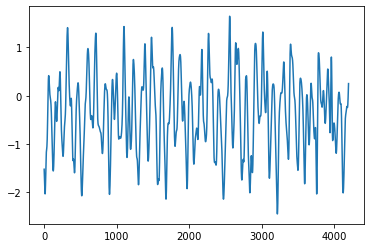

In [22]:
plt.plot(ld_signal[1000:])

# Seg File

In [38]:
import Seg

motion_name = ['ankleTap', 'highKnee', 'Knee_kick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'walking']
motion_name = ['ankle', 'highKnee', 'Kneekick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']

for motion in motion_name:
    seg_path = "Real_data"
    save_seg = "save_data/RealData_Seg"
    frame_length = 240
    Seg.seg(seg_path, motion, save_seg, frame_length, "")

input file is ['Real_data\\EffyAnkle.csv', 'Real_data\\LeafyAnkle.csv', 'Real_data\\NickAnkle.csv', 'Real_data\\QinAnkle.csv', 'Real_data\\ToniiAnkle.csv', 'Real_data\\XuAnkle.csv', 'Real_data\\YamamotoAnkle.csv']
num is 0
num is 1
num is 2
num is 3
num is 4
num is 5
num is 6
num is 7
num is 8
num is 9
num is 10
num is 11
num is 12
num is 13
num is 14
num is 15
num is 16
num is 17
num is 18
num is 19
num is 20
num is 21
num is 22
num is 23
num is 24
num is 25
num is 26
num is 27
num is 28
num is 29
num is 30
num is 31
num is 32
num is 33
num is 34
num is 35
num is 36
num is 37
num is 38
num is 39
num is 40
num is 41
num is 42
num is 43
num is 44
num is 45
num is 46
num is 47
num is 48
num is 49
num is 50
num is 51
num is 52
num is 53
num is 54
num is 55
num is 56
num is 57
num is 58
num is 59
num is 60
num is 61
num is 62
num is 63
num is 64
num is 65
num is 66
num is 67
num is 68
num is 69
num is 70
num is 71
num is 72
num is 73
num is 74
num is 75
num is 76
num is 77
num is 78
num is

In [28]:
path_root = "save_data/ori/test_data/ankleTap.csv"
df = pd.read_csv(path_root, index_col=False, header=None, usecols=[4, 5, 6])
df = np.array(df)
for k in range(df.shape[1]):
    df[:, k] = np_move_avg(df[:, k], 30, mode='same')
df = df.T
df.shape

(3, 5200)

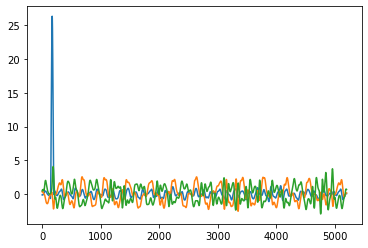

In [29]:
nor_df = df
plt.plot(nor_df[0])
plt.plot(nor_df[1])
plt.plot(nor_df[2])

(1, 5200)


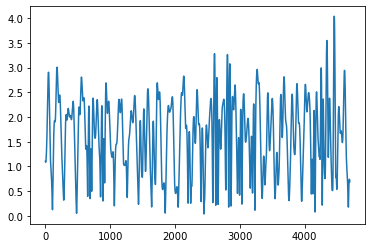

In [39]:
def three_fuse(data):
    axis_num = int(data.shape[0] / 3)
    f_nd = []

    for f_in in range(axis_num):
        nd = []
        index = f_in * 3
        for i in range(data.shape[1]):
            d = data[:, i]
            fuse_data = math.sqrt(d[index] * d[index] + d[index + 1] * d[index + 1] + d[index + 2] * d[index + 2])
            nd.append(fuse_data)
        f_nd.append(nd)
    return f_nd


def axis_normalization(datalist, stage=1):
    normalized_data = []
    #datalist = np.array(datalist)
    for data in datalist:
        maximum = max(data)
        minimum = min(data)
        # print("maximum is:",maximum,"minimum is:",minimum)
        normalized_data.append([(item - minimum) / (maximum - minimum + 1e-6) * stage for item in data])
    return np.array(normalized_data)


fuse_df = three_fuse(df)
nor_df = axis_normalization(fuse_df)
# print(fuse_df[0].shape)
print(nor_df.shape)
plt.plot(fuse_df[0][500:])


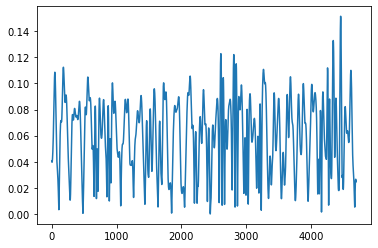

In [40]:
plt.plot(nor_df.T[500:])

(480, 15)


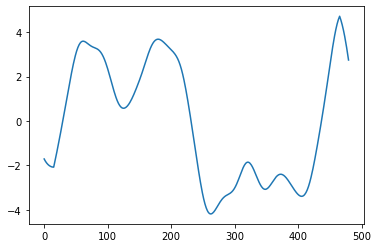

In [70]:
pca = PCA(1)
df = df.T
print(df.shape)
ld_signal = pca.fit_transform(df)
plt.plot(ld_signal)

In [3]:
def use_pca(featuer_data, n_components=5):
    pca = PCA(n_components)
    axis_fea = pca.fit_transform(featuer_data)  # 每个样本降为n_components维
    fea = []
    for raw in range(axis_fea.shape[0]):
        for ele in axis_fea[raw, :]:
            fea.append(ele)
    return fea


def axis_normalization(datalist, stage=1):
    normalized_data = []
    #datalist = np.array(datalist)
    for data in datalist:
        maximum = max(data)
        minimum = min(data)
        # print("maximum is:",maximum,"minimum is:",minimum)
        normalized_data.append([(item - minimum) / (maximum - minimum + 1e-6) * stage for item in data])
    return np.array(normalized_data)


def three_fuse(data):
    axis_num = int(data.shape[0] / 3)
    f_nd = []

    for f_in in range(axis_num):
        nd = []
        index = f_in * 3
        for i in range(data.shape[1]):
            d = data[:, i]
            fuse_data = math.sqrt(d[index] * d[index] + d[index + 1] * d[index + 1] + d[index + 2] * d[index + 2])
            nd.append(fuse_data)
        f_nd.append(nd)
    return f_nd


# 虚拟数据

In [9]:
label = [0, 1, 2, 3, 4, 5, 6, 7]
LABEL_NUM = len(label)
encode_feauture = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]  #[1,1,1,1,1,1,1,1,1,1,1,1]
# encode_feauture = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]  #[1,1,1,1,1,1,1,1,1,1,1,1]
Raw_Data = []
Data_X = []
Label_X = []
PCA_Data = []

# save_data/ori/pos_data/ankleTap_o_pos_merge_data.csv
virtual_data_path = "save_data/Seg_save/"
virtual_motion_type = ['ankleTap', 'highKnee', 'Knee_kick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'walking']
for i in range(len(virtual_motion_type)):
    motion = virtual_motion_type[i]
    motion_file = glob.glob(os.path.join(virtual_data_path + motion, '*.csv'))
    # print(motion_file)
    for motion_frame in motion_file:
        # print(motion_frame)
        df = pd.read_csv(motion_frame, index_col=False, header=None)
        df = np.array(df).T
        # print(df.shape[0])
        for k in range(df.shape[0]):
            #df[:,k] = signal.filtfilt(b,a,df[:,k])
            df[k, :] = np_move_avg(df[k, :], 30, mode='same')

        fuse_df = three_fuse(df)
        # plt.plot(fuse_df[0])
        # pca = PCA(1)
        # ld_signal = pca.fit_transform(df.T)
        # print(ld_signal.shape)
        # pca_signal = []
        # for d in ld_signal:
        #     pca_signal.append(float(d))
        # pca_nor_data = []
        # maximum = max(pca_signal)
        # minimum = min(pca_signal)
        # for item in pca_signal:
        #     pca_nor_data.append((item - minimum) / (maximum - minimum) * 1)
        nor_df = axis_normalization(fuse_df)  #.tolist()
        # plt.plot(nor_df)
        # print(nor_df.shape)
        axis_fea = []
        rd = []
        # print(nor_df.shape[0])
        for raw in range(nor_df.shape[0]):
            tmd = nor_df[raw, :]
            # print(tmd.shape)
            rd.append(tmd)
            cal_fea = Calculate_Feature.Get_Feature(tmd, encode_feauture)
            fea = cal_fea.cal_result()
            # print(len(fea))
            #axis_fea.append(fea)
            # print(len(axis_fea))
            for f in fea:
                axis_fea.append(f)
        # print(len(axis_fea))
        Data_X.append(axis_fea)
        Label_X.append(label[i])
        Raw_Data.append(rd[0])
        # PCA_Data.append(pca_nor_data)

Virtual_Data = np.array(Data_X)
print(Virtual_Data.shape)
# print(Real_Data[0])
for i in range(Virtual_Data.shape[0]):
    Virtual_Data[i] = [0 if math.isnan(x) else x for x in Virtual_Data[i]]
# plt.plot(Real_Data[])
# print(Real_Data.shape)
Row_Virtual_Data = np.array(Raw_Data)
Raw_PCA_Data = np.array(PCA_Data)
#pca = PCA(n_components = 2)
#Real_Data = pca.fit_transform(Real_Data)
Virtual_Label = np.array(Label_X)




20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
2

In [5]:
Virtual_Data.shape  # 多少文件x就多少，y是特征维度

(896, 100)

In [6]:
pca = PCA(2)
Virtual_Data_PCA = pca.fit_transform(Virtual_Data)
Virtual_Data_PCA.shape

(896, 2)

In [4]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
import glob
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut

from sklearn import svm, tree


In [10]:
def k_fold_cv(data, l, n_fold=5):
    #n_fold = 3
    k_fold = KFold(n_splits=n_fold, shuffle=True)
    tmp_train, rf_test, svm_test, svm2_test = list(), list(), list(), list()
    conf_mat = np.zeros((LABEL_NUM, LABEL_NUM))
    #print(Data.shape)
    rf = RandomForestClassifier(n_estimators=30, random_state=42)
    svc = svm.SVC(C=1000, kernel='rbf')
    # clf = TimeSeriesSVC(C=5.4, kernel="gak", gamma="auto", max_iter=-1, n_jobs=-1, decision_function_shape='ovr')

    index = 0
    for train, test in k_fold.split(data):
        #print(train)
        index += 1
        tmp_trx = []
        tmp_try = []
        tmp_raw = []
        for titer in range(len(train)):
            tmp_trx.append(data[train[titer]])
            #tmp_raw.append(data2[train[titer]])
            tmp_try.append(l[train[titer]])
        #print(tmp_trx)
        rf.fit(tmp_trx, tmp_try)
        svc.fit(tmp_trx, tmp_try)

        #clf.fit(tmp_raw, tmp_try)

        tmp_tex = []
        tmp_te_raw_x = []
        tmp_tey = []
        for titer in range(len(test)):
            tmp_tex.append(data[test[titer]])
            #tmp_te_raw_x.append(data2[test[titer]])
            tmp_tey.append(l[test[titer]])

            rf_predicted = rf.predict(tmp_tex)
            svc_predicted = svc.predict(tmp_tex)
            #svc2_predicted = clf.predict(tmp_te_raw_x)

        rf_test.append(accuracy_score(tmp_tey, rf_predicted))
        svm_test.append(accuracy_score(tmp_tey, svc_predicted))
        #svm2_test.append(accuracy_score(tmp_tey,svc2_predicted))
        #tmp_test.append(svc.score(tmp_tex, tmp_tey))
        #print("result of svm classifier", accuracy_score(tmp_tey,svc_predicted))
        #print("result of random forest classifier", accuracy_score(tmp_tey,rf_predicted))

        # confusion matrix calculation
        #print(confusion_matrix(tmp_tey,rf_predicted))
        #conf_mat += confusion_matrix(tmp_tey,rf_predicted)

    rf_score = sum(rf_test) / len(rf_test)
    svm_score = sum(svm_test) / len(svm_test)
    #svm2_score = sum(svm2_test) / len(svm2_test)

    return svm_score, rf_score

In [15]:
Virtual_Data.shape

(896, 55)

In [16]:
Virtual_Data_PCA.shape

(896, 2)

### 降维和不降纬数据差距大，降维损失特征
降维：0.7890068280571074 0.7578088144009931
未降维：0.9397082557417754 0.9687337057728118

In [12]:
svm_result, rf_result = k_fold_cv(Virtual_Data, Virtual_Label)  # Virtual_Data_PCA
print(svm_result, rf_result)

0.9620484171322161 0.9520235878336436


In [45]:
"""将总数据集拆分"""

import os
import shutil

# seg_dataset_path = "save_data/Seg_save/"
seg_dataset_path = "save_data/RealData_Seg/Seg_save"
virtual_motion_type = ['ankleTap', 'highKnee', 'Knee_kick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'walking']

real_motion_type = ['ankle', 'highKnee', 'Kneekick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']

ID = [1, 2, 3, 4, 5, 6, 7]

import os
import shutil

# 目标文件夹路径
# target_folders = ['save_data/Dataset_Virtual/VData_1', 'save_data/Dataset_Virtual/VData_2',
#                   'save_data/Dataset_Virtual/VData_3',
#                   'save_data/Dataset_Virtual/VData_4', 'save_data/Dataset_Virtual/VData_5',
#                   'save_data/Dataset_Virtual/VData_6',
#                   'save_data/Dataset_Virtual/VData_7']

target_folders = ['save_data/Dataset_Real/RData_1', 'save_data/Dataset_Real/RData_2',
                  'save_data/Dataset_Real/RData_3',
                  'save_data/Dataset_Real/RData_4', 'save_data/Dataset_Real/RData_5',
                  'save_data/Dataset_Real/RData_6',
                  'save_data/Dataset_Real/RData_7']

for motion in real_motion_type:
    # 源文件夹路径
    # source_folder = 'save_data/Seg_save/' + motion
    source_folder = 'save_data/RealData_Seg/Seg_save/' + motion

    # 获取源文件夹下的所有文件
    all_files = os.listdir(source_folder)

    # 计算每个目标文件夹应该接收多少文件
    files_per_folder = len(all_files) // len(target_folders)

    # 复制文件到目标文件夹
    for i, target_folder in enumerate(target_folders):
        # 创建目标文件夹（如果不存在）
        if not os.path.exists(target_folder):
            os.makedirs(target_folder)

        # 计算当前目标文件夹应该接收的文件范围
        start_index = i * files_per_folder
        end_index = start_index + files_per_folder

        # 复制文件到当前目标文件夹
        for file_name in all_files[start_index:end_index]:
            source_file_path = os.path.join(source_folder, file_name)
            target_file_path = os.path.join(target_folder, file_name)
            shutil.copy(source_file_path, target_file_path)

    # 处理剩余的文件（如果有的话）
    for file_name in all_files[len(target_folders) * files_per_folder:]:
        source_file_path = os.path.join(source_folder, file_name)
        target_file_path = os.path.join(target_folders[-1], file_name)
        shutil.copy(source_file_path, target_file_path)

    # 源文件夹路径
# source_folder = '/path/to/source_folder'


In [46]:
for name in target_folders:
    source_folder = name
    target_base_folder = name

    # Read_motion_type = ['ankleTap', 'highKnee', 'Knee_kick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'walking']
    Read_motion_type = ['ankle', 'highKnee', 'Kneekick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']
    # 获取源文件夹下的所有文件
    all_files = os.listdir(source_folder)
    print(len(all_files))
    for motion_type in Read_motion_type:
        target_folder = os.path.join(target_base_folder, motion_type)
        if not os.path.exists(target_folder):
            os.makedirs(target_folder)

    # 将文件复制到对应的文件夹内
    for file_name in all_files:
        for motion_type in Read_motion_type:
            if file_name.lower().startswith(motion_type.lower()):
                source_file_path = os.path.join(source_folder, file_name)
                target_folder = os.path.join(target_base_folder, motion_type)
                target_file_path = os.path.join(target_folder, file_name)
                shutil.move(source_file_path, target_file_path)

154
154
154
154
154
154
154


In [38]:
l_rf = RandomForestClassifier(n_estimators=30, random_state=42)
l_svc = svm.SVC(C=1000, kernel='rbf')
l_clftree = tree.DecisionTreeClassifier(criterion='entropy')

loo = LeaveOneOut()

# real_path = '/Users/nickxia/Desktop/StudyMaterials/RealData-Sample/2-sensor/Data/XData/Dataset-ID-'
ID = [1, 2, 3, 4, 5, 6, 7]
label = [0, 1, 2, 3, 4, 5, 6, 7]
virtual_data_path = "save_data/Dataset_Virtual/VData_"
virtual_motion_type = ['ankleTap', 'highKnee', 'Knee_kick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'walking']
encode_feauture = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]  #[1,1,1,1,1,1,1,1,1,1,1,1]

Real_data_path = "save_data/Dataset_Virtual/RData_"
Real_motion_type = ['ankle', 'highKnee', 'Kneekick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']


In [32]:
total_file = []
for index in ID:
    total_file.append(virtual_data_path + str(index))
# print(loo.split(total_file))
for train_index, test_index in loo.split(total_file):
    print(train_index, test_index)

[1 2 3 4 5 6] [0]
[0 2 3 4 5 6] [1]
[0 1 3 4 5 6] [2]
[0 1 2 4 5 6] [3]
[0 1 2 3 5 6] [4]
[0 1 2 3 4 6] [5]
[0 1 2 3 4 5] [6]


# 真实数据

In [76]:
rf_predicted = []
svm_predicted = []
decisiontree_predicted = []
for train_index, test_index in loo.split(total_file):
    print(train_index, test_index)
    Data_X = []
    Label_X = []
    TestData_X = []
    TestLabel_X = []
    true_label = []
    for tmtrain in train_index:
        print(tmtrain)
        subject = total_file[tmtrain]  # for each subject
        #subject_file = glob.glob(os.path.join(subject,'*.csv'))
        for i in range(len(virtual_motion_type)):
            motion = virtual_motion_type[i]
            motion_file = glob.glob(os.path.join(subject + '/' + motion, '*.csv'))
            # print(motion_file)
            for motion_frame in motion_file:
                #print(motion_frame)
                # df = pd.read_csv(motion_frame, index_col=False, header=None, usecols= [12,13,14])#1,2,3,4,5,6,7,8,9,10,11,12
                df = pd.read_csv(motion_frame, index_col=False, header=None,
                                 usecols=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])  #1,2,3,4,5,6,7,8,9,10,11,12
                df = np.array(df).T
                for k in range(df.shape[0]):
                    #df[:,k] = signal.filtfilt(b,a,df[:,k])
                    df[k, :] = np_move_avg(df[k, :], 10, mode='same')

                #fuse three axis-data
                fuse_df = three_fuse(df)
                nor_df = axis_normalization(fuse_df)  #.tolist()
                axis_fea = []
                rd = []
                for raw in range(nor_df.shape[0]):
                    tmd = nor_df[raw, :]
                    rd.append(tmd)
                    cal_fea = Calculate_Feature.Get_Feature(tmd, encode_feauture)
                    fea = cal_fea.cal_result()
                    for f in fea:
                        axis_fea.append(f)

                Data_X.append(axis_fea)
                Label_X.append(label[i])

    Real_Data = np.array(Data_X)
    Real_Label = np.array(Label_X)
    # print(Real_Data.shape)

    pca = PCA(2)
    for i in range(Real_Data.shape[0]):
        Real_Data[i] = [0 if math.isnan(x) else x for x in Real_Data[i]]
    Real_Data = pca.fit_transform(Real_Data)

    print("real sample size is:", Real_Data.shape)
    l_rf.fit(Real_Data, Real_Label)
    l_svc.fit(Real_Data, Real_Label)
    l_clftree.fit(Real_Data, Real_Label)

    for tmtest in test_index:
        # print(tmtest)
        subject = total_file[tmtest]  # for each subject
        #subject_file = glob.glob(os.path.join(subject,'*.csv'))
        for i in range(len(virtual_motion_type)):
            motion = virtual_motion_type[i]
            motion_file = glob.glob(os.path.join(subject + '/' + motion, '*.csv'))
            for motion_frame in motion_file:
                #print(motion_frame)
                df = pd.read_csv(motion_frame, index_col=False, header=None,
                                 usecols=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])  #1,2,3,4,5,6,7,8,9,10,11,12
                # df = pd.read_csv(motion_frame, index_col=False, header=None)  #1,2,3,4,5,6,7,8,9,10,11,12
                df = np.array(df).T
                for k in range(df.shape[0]):
                    #df[:,k] = signal.filtfilt(b,a,df[:,k])
                    df[k, :] = np_move_avg(df[k, :], 10, mode='same')

                #fuse three axis-data
                fuse_df = three_fuse(df)
                nor_df = axis_normalization(fuse_df)  #.tolist()
                axis_fea = []
                rd = []
                for raw in range(nor_df.shape[0]):
                    tmd = nor_df[raw, :]
                    rd.append(tmd)
                    cal_fea = Calculate_Feature.Get_Feature(tmd, encode_feauture)
                    fea = cal_fea.cal_result()
                    for f in fea:
                        axis_fea.append(f)

                TestData_X.append(axis_fea)
                TestLabel_X.append(label[i])
    TestData = np.array(TestData_X)
    TestLabel = np.array(TestLabel_X)

    pca = PCA(2)
    TestData = pca.fit_transform(TestData)
    print("test sample size is:", TestData.shape)
    #     rf_predicted.append(l_rf.predict(TestData))
    #     svm_predicted.append(l_svc.predict(TestData))
    #     decisiontree_predicted.append(l_clftree.predict(TestData))

    rf_predicted.append(accuracy_score(TestLabel, l_rf.predict(TestData)))
    svm_predicted.append(accuracy_score(TestLabel, l_svc.predict(TestData)))
    decisiontree_predicted.append(accuracy_score(TestLabel, l_clftree.predict(TestData)))

    #true_label.append(TestLabel_X[0])

    print("*****")

[1 2 3 4 5 6] [0]
1
2
3
4
5
6
real sample size is: (771, 2)
test sample size is: (125, 2)
*****
[0 2 3 4 5 6] [1]
0
2
3
4
5
6
real sample size is: (771, 2)
test sample size is: (125, 2)
*****
[0 1 3 4 5 6] [2]
0
1
3
4
5
6
real sample size is: (771, 2)
test sample size is: (125, 2)
*****
[0 1 2 4 5 6] [3]
0
1
2
4
5
6
real sample size is: (771, 2)
test sample size is: (125, 2)
*****
[0 1 2 3 5 6] [4]
0
1
2
3
5
6
real sample size is: (771, 2)
test sample size is: (125, 2)
*****
[0 1 2 3 4 6] [5]
0
1
2
3
4
6
real sample size is: (771, 2)
test sample size is: (125, 2)
*****
[0 1 2 3 4 5] [6]
0
1
2
3
4
5
real sample size is: (750, 2)
test sample size is: (146, 2)
*****


In [77]:
rf_predicted

[0.152, 0.144, 0.192, 0.024, 0.048, 0.248, 0.7397260273972602]

In [78]:
svm_predicted

[0.144, 0.168, 0.136, 0.04, 0.024, 0.2, 0.773972602739726]

In [79]:
decisiontree_predicted

[0.16, 0.136, 0.152, 0.04, 0.064, 0.168, 0.6986301369863014]

### 真实数据测试

In [67]:
l_rf = RandomForestClassifier(n_estimators=30, random_state=42)
l_svc = svm.SVC(C=1000, kernel='rbf')
l_clftree = tree.DecisionTreeClassifier(criterion='entropy')

loo = LeaveOneOut()

# real_path = '/Users/nickxia/Desktop/StudyMaterials/RealData-Sample/2-sensor/Data/XData/Dataset-ID-'
ID = [1, 2, 3, 4, 5, 6, 7]
label = [0, 1, 2, 3, 4, 5, 6, 7]
encode_feauture = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
Real_data_path = "save_data/Dataset_Real/RData_"
Real_motion_type = ['ankle', 'highKnee', 'Kneekick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']

In [68]:
total_file = []
for index in ID:
    total_file.append(Real_data_path + str(index))
print(total_file)
for train_index, test_index in loo.split(total_file):
    print(train_index, test_index)

['save_data/Dataset_Real/RData_1', 'save_data/Dataset_Real/RData_2', 'save_data/Dataset_Real/RData_3', 'save_data/Dataset_Real/RData_4', 'save_data/Dataset_Real/RData_5', 'save_data/Dataset_Real/RData_6', 'save_data/Dataset_Real/RData_7']
[1 2 3 4 5 6] [0]
[0 2 3 4 5 6] [1]
[0 1 3 4 5 6] [2]
[0 1 2 4 5 6] [3]
[0 1 2 3 5 6] [4]
[0 1 2 3 4 6] [5]
[0 1 2 3 4 5] [6]


In [69]:
rf_predicted = []
svm_predicted = []
decisiontree_predicted = []
for train_index, test_index in loo.split(total_file):
    print(train_index, test_index)
    Data_X = []
    Label_X = []
    TestData_X = []
    TestLabel_X = []
    true_label = []
    for tmtrain in train_index:
        print(tmtrain)
        subject = total_file[tmtrain]  # for each subject
        #subject_file = glob.glob(os.path.join(subject,'*.csv'))
        for i in range(len(Real_motion_type)):
            motion = Real_motion_type[i]
            motion_file = glob.glob(os.path.join(subject + '/' + motion, '*.csv'))
            # print(motion_file)
            for motion_frame in motion_file:
                #print(motion_frame)
                # df = pd.read_csv(motion_frame, index_col=False, header=None, usecols= [12,13,14])#1,2,3,4,5,6,7,8,9,10,11,12
                df = pd.read_csv(motion_frame, index_col=False, header=None,
                                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14])  #1,2,3,4,5,6,7,8,9,10,11,12
                df = np.array(df).T
                for k in range(df.shape[0]):
                    #df[:,k] = signal.filtfilt(b,a,df[:,k])
                    df[k, :] = np_move_avg(df[k, :], 30, mode='same')

                #fuse three axis-data
                fuse_df = three_fuse(df)
                nor_df = axis_normalization(fuse_df)  #.tolist()
                axis_fea = []
                rd = []
                for raw in range(nor_df.shape[0]):
                    tmd = nor_df[raw, :]
                    rd.append(tmd)
                    cal_fea = Calculate_Feature.Get_Feature(tmd, encode_feauture)
                    fea = cal_fea.cal_result()
                    for f in fea:
                        axis_fea.append(f)

                Data_X.append(axis_fea)
                Label_X.append(label[i])

    Real_Data = np.array(Data_X)
    Real_Label = np.array(Label_X)
    # print(Real_Data.shape)

    for i in range(Real_Data.shape[0]):
        Real_Data[i] = [0 if math.isnan(x) else x for x in Real_Data[i]]

    # pca = PCA(30)
    # Real_Data = pca.fit_transform(Real_Data)

    print("real sample size is:", Real_Data.shape)
    l_rf.fit(Real_Data, Real_Label)
    l_svc.fit(Real_Data, Real_Label)
    l_clftree.fit(Real_Data, Real_Label)

    for tmtest in test_index:
        # print(tmtest)
        subject = total_file[tmtest]  # for each subject
        #subject_file = glob.glob(os.path.join(subject,'*.csv'))
        for i in range(len(Real_motion_type)):
            motion = Real_motion_type[i]
            motion_file = glob.glob(os.path.join(subject + '/' + motion, '*.csv'))
            for motion_frame in motion_file:
                #print(motion_frame)
                df = pd.read_csv(motion_frame, index_col=False, header=None,
                                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14])  #1,2,3,4,5,6,7,8,9,10,11,12
                # df = pd.read_csv(motion_frame, index_col=False, header=None)  #1,2,3,4,5,6,7,8,9,10,11,12
                df = np.array(df).T
                for k in range(df.shape[0]):
                    #df[:,k] = signal.filtfilt(b,a,df[:,k])
                    df[k, :] = np_move_avg(df[k, :], 30, mode='same')

                #fuse three axis-data
                fuse_df = three_fuse(df)
                nor_df = axis_normalization(fuse_df)  #.tolist()
                axis_fea = []
                rd = []
                for raw in range(nor_df.shape[0]):
                    tmd = nor_df[raw, :]
                    rd.append(tmd)
                    cal_fea = Calculate_Feature.Get_Feature(tmd, encode_feauture)
                    fea = cal_fea.cal_result()
                    for f in fea:
                        axis_fea.append(f)

                TestData_X.append(axis_fea)
                TestLabel_X.append(label[i])
    TestData = np.array(TestData_X)
    TestLabel = np.array(TestLabel_X)

    # pca = PCA(30)
    # TestData = pca.fit_transform(TestData)
    print("test sample size is:", TestData.shape)

    rf_predicted.append(accuracy_score(TestLabel, l_rf.predict(TestData)))
    svm_predicted.append(accuracy_score(TestLabel, l_svc.predict(TestData)))
    decisiontree_predicted.append(accuracy_score(TestLabel, l_clftree.predict(TestData)))

    #true_label.append(TestLabel_X[0])

    print("*****")

[1 2 3 4 5 6] [0]
1
2
3
4
5
6
real sample size is: (924, 100)
test sample size is: (154, 100)
*****
[0 2 3 4 5 6] [1]
0
2
3
4
5
6
real sample size is: (924, 100)
test sample size is: (154, 100)
*****
[0 1 3 4 5 6] [2]
0
1
3
4
5
6
real sample size is: (924, 100)
test sample size is: (154, 100)
*****
[0 1 2 4 5 6] [3]
0
1
2
4
5
6
real sample size is: (924, 100)
test sample size is: (154, 100)
*****
[0 1 2 3 5 6] [4]
0
1
2
3
5
6
real sample size is: (924, 100)
test sample size is: (154, 100)
*****
[0 1 2 3 4 6] [5]
0
1
2
3
4
6
real sample size is: (924, 100)
test sample size is: (154, 100)
*****
[0 1 2 3 4 5] [6]
0
1
2
3
4
5
real sample size is: (924, 100)
test sample size is: (154, 100)
*****


In [72]:
print(sum(rf_predicted) / 7)
print(sum(svm_predicted) / 7)
print(sum(decisiontree_predicted) / 7)

0.9063079777365493
0.9109461966604824
0.767161410018553


### Virtual Train Real Test

In [74]:
l_rf = RandomForestClassifier(n_estimators=30, random_state=42)
l_svc = svm.SVC(C=1000, kernel='rbf')
l_clftree = tree.DecisionTreeClassifier(criterion='entropy')

# loo = LeaveOneOut()

# real_path = '/Users/nickxia/Desktop/StudyMaterials/RealData-Sample/2-sensor/Data/XData/Dataset-ID-'
ID = [1, 2, 3, 4, 5, 6, 7]
label = [0, 1, 2, 3, 4, 5, 6, 7]
encode_feauture = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
Real_data_path = "save_data/Dataset_Real/RData_"
# Real_motion_type = ['ankle', 'highKnee', 'Kneekick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']
Real_motion_type = ['ankle', 'highKnee', 'reverseLunge', 'sideCrunch', 'sidetoside', ]

virtual_data_path = "save_data/Dataset_Virtual/VData_"
virtual_motion_type = ['ankleTap', 'highKnee', 'reverseLunge', 'sideCrunch', 'sidetoside']

In [138]:
virtual_total_file = []
real_total_file = []
total_file = []

for index in ID:
    virtual_total_file.append(virtual_data_path + str(index))
    total_file.append(virtual_data_path + str(index))

for index in ID:
    real_total_file.append(Real_data_path + str(index))
    total_file.append(Real_data_path + str(index))
print(total_file)


['save_data/Dataset_Virtual/VData_1', 'save_data/Dataset_Virtual/VData_2', 'save_data/Dataset_Virtual/VData_3', 'save_data/Dataset_Virtual/VData_4', 'save_data/Dataset_Virtual/VData_5', 'save_data/Dataset_Virtual/VData_6', 'save_data/Dataset_Virtual/VData_7', 'save_data/Dataset_Real/RData_1', 'save_data/Dataset_Real/RData_2', 'save_data/Dataset_Real/RData_3', 'save_data/Dataset_Real/RData_4', 'save_data/Dataset_Real/RData_5', 'save_data/Dataset_Real/RData_6', 'save_data/Dataset_Real/RData_7']


In [165]:
class CustomLeaveOneOut:
    def __init__(self, start=7, end=13):
        self.start = start
        self.end = end
        self.current = start

    def __iter__(self):
        return self

    def __next__(self):
        if self.current > self.end:
            raise StopIteration
        test_indices = [self.current]
        train_indices = list(range(self.start, self.end + 1))
        train_indices.remove(self.current)
        self.current += 1
        return list(range(2)) + train_indices, test_indices
        # return train_indices, test_indices

# loo = CustomLeaveOneOut(start=7, end=10)
#
# for train_indices, test_indices in loo:
#     print("Train Indices:", train_indices)
#     print("Test Indices:", test_indices)



In [166]:
loo = CustomLeaveOneOut(start=7, end=13)
rf_predicted = []
svm_predicted = []
decisiontree_predicted = []
# for train_index, test_index in loo.split(total_file):
#     print(train_index,test_index)
for train_index, test_index in loo:
    print(train_index, test_index)
    Data_X = []
    Label_X = []
    TestData_X = []
    TestLabel_X = []
    true_label = []
    for tmtrain in train_index:
        # print(tmtrain)
        subject = total_file[tmtrain]  # for each subject
        #subject_file = glob.glob(os.path.join(subject,'*.csv'))
        for i in range(len(Real_motion_type)):
            motion = Real_motion_type[i]
            motion_file = glob.glob(os.path.join(subject + '/' + '*' + motion + '*', '*.csv'))
            # print(motion_file)
            for motion_frame in motion_file:
                #print(motion_frame)
                # df = pd.read_csv(motion_frame, index_col=False, header=None, usecols= [12,13,14])#1,2,3,4,5,6,7,8,9,10,11,12
                df = pd.read_csv(motion_frame, index_col=False, header=None,
                                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14])  #1,2,3,4,5,6,7,8,9,10,11,12
                df = np.array(df).T
                for k in range(df.shape[0]):
                    #df[:,k] = signal.filtfilt(b,a,df[:,k])
                    df[k, :] = np_move_avg(df[k, :], 30, mode='same')

                #fuse three axis-data
                fuse_df = three_fuse(df)
                nor_df = axis_normalization(fuse_df)  #.tolist()
                axis_fea = []
                rd = []
                for raw in range(nor_df.shape[0]):
                    tmd = nor_df[raw, :]
                    rd.append(tmd)
                    cal_fea = Calculate_Feature.Get_Feature(tmd, encode_feauture)
                    fea = cal_fea.cal_result()
                    for f in fea:
                        axis_fea.append(f)

                Data_X.append(axis_fea)
                Label_X.append(label[i])

    Real_Data = np.array(Data_X)
    Real_Label = np.array(Label_X)
    # print(Real_Data.shape)

    for i in range(Real_Data.shape[0]):
        Real_Data[i] = [0 if math.isnan(x) else x for x in Real_Data[i]]

    # pca = PCA(2)
    # Real_Data = pca.fit_transform(Real_Data)

    print("real sample size is:", Real_Data.shape)
    l_rf.fit(Real_Data, Real_Label)
    l_svc.fit(Real_Data, Real_Label)
    l_clftree.fit(Real_Data, Real_Label)

    for tmtest in test_index:
        # print(tmtest)
        subject = total_file[tmtest]  # for each subject
        #subject_file = glob.glob(os.path.join(subject,'*.csv'))
        for i in range(len(Real_motion_type)):
            motion = Real_motion_type[i]
            motion_file = glob.glob(os.path.join(subject + '/' + '*' + motion + '*', '*.csv'))
            for motion_frame in motion_file:
                #print(motion_frame)
                df = pd.read_csv(motion_frame, index_col=False, header=None,
                                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14])  #1,2,3,4,5,6,7,8,9,10,11,12
                # df = pd.read_csv(motion_frame, index_col=False, header=None)  #1,2,3,4,5,6,7,8,9,10,11,12
                df = np.array(df).T
                for k in range(df.shape[0]):
                    #df[:,k] = signal.filtfilt(b,a,df[:,k])
                    df[k, :] = np_move_avg(df[k, :], 30, mode='same')

                #fuse three axis-data
                fuse_df = three_fuse(df)
                nor_df = axis_normalization(fuse_df)  #.tolist()
                axis_fea = []
                rd = []
                for raw in range(nor_df.shape[0]):
                    tmd = nor_df[raw, :]
                    rd.append(tmd)
                    cal_fea = Calculate_Feature.Get_Feature(tmd, encode_feauture)
                    fea = cal_fea.cal_result()
                    for f in fea:
                        axis_fea.append(f)

                TestData_X.append(axis_fea)
                TestLabel_X.append(label[i])
    TestData = np.array(TestData_X)
    TestLabel = np.array(TestLabel_X)

    # pca = PCA(2)
    # TestData = pca.fit_transform(TestData)
    print("test sample size is:", TestData.shape)

    rf_predicted.append(accuracy_score(TestLabel, l_rf.predict(TestData)))
    svm_predicted.append(accuracy_score(TestLabel, l_svc.predict(TestData)))
    decisiontree_predicted.append(accuracy_score(TestLabel, l_clftree.predict(TestData)))

    #true_label.append(TestLabel_X[0])

    print("*****")

[0, 1, 8, 9, 10, 11, 12, 13] [7]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (1106, 100)
test sample size is: (154, 100)
*****
[0, 1, 7, 9, 10, 11, 12, 13] [8]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (1106, 100)
test sample size is: (154, 100)
*****
[0, 1, 7, 8, 10, 11, 12, 13] [9]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (1106, 100)
test sample size is: (154, 100)
*****
[0, 1, 7, 8, 9, 11, 12, 13] [10]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (1106, 100)
test sample size is: (154, 100)
*****
[0, 1, 7, 8, 9, 10, 12, 13] [11]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (1106, 100)
test sample size is: (154, 100)
*****
[0, 1, 7, 8, 9, 10, 11, 13] [12]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (1106, 100)
test sample size is: (154, 100)
*****
[0, 1, 7, 8, 9, 10, 11, 12] [13]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (1106, 100)
test sample size is: (154, 100)
*****


### Result Record
RealTrain and Test:
0.9063079777365493
0.9109461966604824
0.7634508348794063
#######################
Real plus Virtual Train  Real Test all column
0.9072356215213359
0.8617810760667904
0.7170686456400741
##########################
Real plus Virtual Train  Real Test( without waist data
0.8858998144712432
0.823747680890538
0.7458256029684601
###############################
Real plus Virtual Train  Real Test( without waist data PCA=2
0.15584415584415584
0.12708719851576994
0.14285714285714285
#################################
real data = 4
0.8149350649350648
0.7337662337662337
0.6834415584415584
##############################
real data = 3
0.8593073593073594
0.8246753246753246
0.6212121212121212
###########################
real data = 4
0.8165584415584416
0.8246753246753247
0.6152597402597403

In [170]:
print(sum(rf_predicted) / 7)
print(sum(svm_predicted) / 7)
print(sum(decisiontree_predicted) / 7)

0.9128014842300557
0.8877551020408164
0.7319109461966605


In [169]:
print(rf_predicted)
print(svm_predicted)
print(decisiontree_predicted)

[0.9025974025974026, 0.8441558441558441, 0.9090909090909091, 0.9285714285714286, 0.961038961038961, 0.9285714285714286, 0.9155844155844156]
[0.9090909090909091, 0.8246753246753247, 0.9805194805194806, 0.8506493506493507, 0.8831168831168831, 0.9155844155844156, 0.8506493506493507]
[0.6883116883116883, 0.6623376623376623, 0.7597402597402597, 0.6818181818181818, 0.8246753246753247, 0.7662337662337663, 0.7402597402597403]


# Virtual Train and Real Test

In [32]:
# l_rf = RandomForestClassifier(n_estimators=30, random_state=42)
l_rf = RandomForestClassifier(n_estimators=50, random_state=42)
# l_svc = svm.SVC(C=1000, kernel='rbf')
l_svc = svm.SVC(C=1.0, kernel='rbf')
l_clftree = tree.DecisionTreeClassifier(criterion='entropy')

# loo = LeaveOneOut()

# real_path = '/Users/nickxia/Desktop/StudyMaterials/RealData-Sample/2-sensor/Data/XData/Dataset-ID-'
ID = [1, 2, 3, 4, 5, 6, 7]
label = [0, 1, 2, 3, 4, 5, 6, 7]
encode_feauture = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
# encode_feauture = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
Real_data_path = "save_data/Dataset_Real/RData_"
# Real_motion_type = ['ankle', 'highKnee', 'Kneekick', 'reverseLunge', 'sideCrunch', 'sidetoside', 'warmup']
Real_motion_type = ['ankle', 'highKnee', 'reverseLunge', 'sideCrunch', 'sidetoside', ]

virtual_data_path = "save_data/Dataset_Virtual/VData_"
virtual_motion_type = ['ankleTap', 'highKnee', 'reverseLunge', 'sideCrunch', 'sidetoside']

In [26]:
virtual_total_file = []
real_total_file = []
total_file = []

for index in ID:
    virtual_total_file.append(virtual_data_path + str(index))
    total_file.append(virtual_data_path + str(index))

for index in ID:
    real_total_file.append(Real_data_path + str(index))
    total_file.append(Real_data_path + str(index))
print(total_file)

['save_data/Dataset_Virtual/VData_1', 'save_data/Dataset_Virtual/VData_2', 'save_data/Dataset_Virtual/VData_3', 'save_data/Dataset_Virtual/VData_4', 'save_data/Dataset_Virtual/VData_5', 'save_data/Dataset_Virtual/VData_6', 'save_data/Dataset_Virtual/VData_7', 'save_data/Dataset_Real/RData_1', 'save_data/Dataset_Real/RData_2', 'save_data/Dataset_Real/RData_3', 'save_data/Dataset_Real/RData_4', 'save_data/Dataset_Real/RData_5', 'save_data/Dataset_Real/RData_6', 'save_data/Dataset_Real/RData_7']


In [21]:
class CustomLeaveOneOut:
    def __init__(self, start=7, end=13):
        self.start = start
        self.end = end
        self.current = start

    def __iter__(self):
        return self

    def __next__(self):
        if self.current > self.end:
            raise StopIteration
        test_indices = [self.current]
        train_indices = list(range(self.start, self.end + 1))
        train_indices.remove(self.current)
        self.current += 1
        # return list(range(2)) + train_indices, test_indices
        return list(range(7)), test_indices

# loo = CustomLeaveOneOut(start=7, end=13)
#
# for train_indices, test_indices in loo:
#     print("Train Indices:", train_indices)
#     print("Test Indices:", test_indices)

In [33]:
loo = CustomLeaveOneOut(start=7, end=13)
rf_predicted = []
svm_predicted = []
decisiontree_predicted = []
# for train_index, test_index in loo.split(total_file):
#     print(train_index,test_index)
for train_index, test_index in loo:
    print(train_index, test_index)
    Data_X = []
    Label_X = []
    TestData_X = []
    TestLabel_X = []
    true_label = []
    for tmtrain in train_index:
        # print(tmtrain)
        subject = total_file[tmtrain]  # for each subject
        #subject_file = glob.glob(os.path.join(subject,'*.csv'))
        for i in range(len(Real_motion_type)):
            motion = Real_motion_type[i]
            motion_file = glob.glob(os.path.join(subject + '/' + '*' + motion + '*', '*.csv'))
            # print(motion_file)
            for motion_frame in motion_file:
                #print(motion_frame)
                # df = pd.read_csv(motion_frame, index_col=False, header=None, usecols= [12,13,14])#1,2,3,4,5,6,7,8,9,10,11,12
                df = pd.read_csv(motion_frame, index_col=False, header=None,
                                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14])  #1,2,3,4,5,6,7,8,9,10,11,12
                df = np.array(df).T
                for k in range(df.shape[0]):
                    #df[:,k] = signal.filtfilt(b,a,df[:,k])
                    df[k, :] = np_move_avg(df[k, :], 30, mode='same')

                #fuse three axis-data
                fuse_df = three_fuse(df)
                nor_df = axis_normalization(fuse_df)  #.tolist()
                axis_fea = []
                rd = []
                for raw in range(nor_df.shape[0]):
                    tmd = nor_df[raw, :]
                    rd.append(tmd)
                    cal_fea = Calculate_Feature.Get_Feature(tmd, encode_feauture)
                    fea = cal_fea.cal_result()
                    # pca = PCA(2)
                    # fea = pca.fit_transform(fea) # 降维测试
                    for f in fea:
                        axis_fea.append(f)

                Data_X.append(axis_fea)
                Label_X.append(label[i])

    Real_Data = np.array(Data_X)
    Real_Label = np.array(Label_X)
    # print(Real_Data.shape)

    for i in range(Real_Data.shape[0]):
        Real_Data[i] = [0 if math.isnan(x) else x for x in Real_Data[i]]

    # pca = PCA(2)
    # Real_Data = pca.fit_transform(Real_Data)

    print("real sample size is:", Real_Data.shape)
    l_rf.fit(Real_Data, Real_Label)
    l_svc.fit(Real_Data, Real_Label)
    l_clftree.fit(Real_Data, Real_Label)

    for tmtest in test_index:
        # print(tmtest)
        subject = total_file[tmtest]  # for each subject
        #subject_file = glob.glob(os.path.join(subject,'*.csv'))
        for i in range(len(Real_motion_type)):
            motion = Real_motion_type[i]
            motion_file = glob.glob(os.path.join(subject + '/' + '*' + motion + '*', '*.csv'))
            for motion_frame in motion_file:
                #print(motion_frame)
                df = pd.read_csv(motion_frame, index_col=False, header=None,
                                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14])  #1,2,3,4,5,6,7,8,9,10,11,12
                # df = pd.read_csv(motion_frame, index_col=False, header=None)  #1,2,3,4,5,6,7,8,9,10,11,12
                df = np.array(df).T
                for k in range(df.shape[0]):
                    #df[:,k] = signal.filtfilt(b,a,df[:,k])
                    df[k, :] = np_move_avg(df[k, :], 30, mode='same')

                #fuse three axis-data
                fuse_df = three_fuse(df)
                nor_df = axis_normalization(fuse_df)  #.tolist()
                axis_fea = []
                rd = []
                for raw in range(nor_df.shape[0]):
                    tmd = nor_df[raw, :]
                    rd.append(tmd)
                    cal_fea = Calculate_Feature.Get_Feature(tmd, encode_feauture)
                    fea = cal_fea.cal_result()
                    # pca = PCA(2)
                    # fea = pca.fit_transform(fea) #降维测试
                    for f in fea:
                        axis_fea.append(f)

                TestData_X.append(axis_fea)
                TestLabel_X.append(label[i])
    TestData = np.array(TestData_X)
    TestLabel = np.array(TestLabel_X)

    # pca = PCA(2)
    # TestData = pca.fit_transform(TestData)
    print("test sample size is:", TestData.shape)

    rf_predicted.append(accuracy_score(TestLabel, l_rf.predict(TestData)))
    svm_predicted.append(accuracy_score(TestLabel, l_svc.predict(TestData)))
    decisiontree_predicted.append(accuracy_score(TestLabel, l_clftree.predict(TestData)))

    #true_label.append(TestLabel_X[0])

    print("*****")

[0, 1, 2, 3, 4, 5, 6] [7]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (648, 100)
test sample size is: (110, 100)
*****
[0, 1, 2, 3, 4, 5, 6] [8]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (648, 100)
test sample size is: (110, 100)
*****
[0, 1, 2, 3, 4, 5, 6] [9]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (648, 100)
test sample size is: (110, 100)
*****
[0, 1, 2, 3, 4, 5, 6] [10]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (648, 100)
test sample size is: (110, 100)
*****
[0, 1, 2, 3, 4, 5, 6] [11]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (648, 100)
test sample size is: (110, 100)
*****
[0, 1, 2, 3, 4, 5, 6] [12]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (648, 100)
test sample size is: (110, 100)
*****
[0, 1, 2, 3, 4, 5, 6] [13]


F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.result.append((sum(s)/sum(psd)))
F:\IMU\code\script\imu_data\11.21FBX+RealIMU\Calculate_Feature.py:95: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = np.divide(psd, psd.sum())


real sample size is: (648, 100)
test sample size is: (110, 100)
*****


In [37]:
print(sum(rf_predicted) / 7)
print(sum(svm_predicted) / 7)
print(sum(decisiontree_predicted) / 7)

0.20909090909090908
0.22077922077922074
0.212987012987013


In [34]:
print(rf_predicted)
print(svm_predicted)
print(decisiontree_predicted)

[0.20909090909090908, 0.2, 0.2, 0.22727272727272727, 0.22727272727272727, 0.2, 0.2]
[0.20909090909090908, 0.2636363636363636, 0.21818181818181817, 0.23636363636363636, 0.20909090909090908, 0.2, 0.20909090909090908]
[0.16363636363636364, 0.20909090909090908, 0.24545454545454545, 0.17272727272727273, 0.2818181818181818, 0.18181818181818182, 0.23636363636363636]
